In [22]:
# 1. Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [23]:
# 2. Veri setini yükle
data_path = "/Users/mustafacitak/Desktop/Python/ML/ML_Calisma/Housing_01.csv"
housing_data = pd.read_csv(data_path)
print(housing_data.head())

# 3. Veri setini incele
#print("Veri seti bilgileri:\n", housing_data.info())
print("\nEksik değerlerin sayısı:\n", housing_data.isna().sum())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Eksik değerlerin sayısı:
 price               0
area                0
bedrooms            0
bathro

In [24]:
# 4. Kategorik değişkenleri dönüştür
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
label_encoder = LabelEncoder()
for col in categorical_cols:
    housing_data[col] = label_encoder.fit_transform(housing_data[col])

# 5. Eksik değerleri doldur
#housing_data.fillna(housing_data.mean(), inplace=True)

# 6. Özellikleri ve hedef değişkeni belirle
X = housing_data.drop(columns=["price"])
y = housing_data["price"]

In [25]:
# 7. Train ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Modeli oluştur
model = LinearRegression()

# 9. Modeli eğit
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Verilen özelliklerle bir veri çerçevesi oluştur
new_data = pd.DataFrame({
    "area": [600],
    "bedrooms": [4],
    "bathrooms": [2],
    "stories": [2],
    "mainroad": [1],  # yes için 1
    "guestroom": [1],  # yes için 1
    "basement": [0],  # no için 0
    "hotwaterheating": [1],  # yes için 1
    "airconditioning": [0],  # no için 0
    "parking": [1],
    "prefarea": [1],  # yes için 1
    "furnishingstatus": [0]
})

# Tahmin yap
predicted_price = model.predict(new_data)

# Tahmini yazdır
print("Tahmin edilen fiyat:", predicted_price)

Tahmin edilen fiyat: [5899081.60679388]


In [27]:
# 10. Modeli değerlendir
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("\nEğitim seti doğruluk skoru:", train_score)
print("Test seti doğruluk skoru:", test_score)


Eğitim seti doğruluk skoru: 0.6854429472843788
Test seti doğruluk skoru: 0.6494754192267804


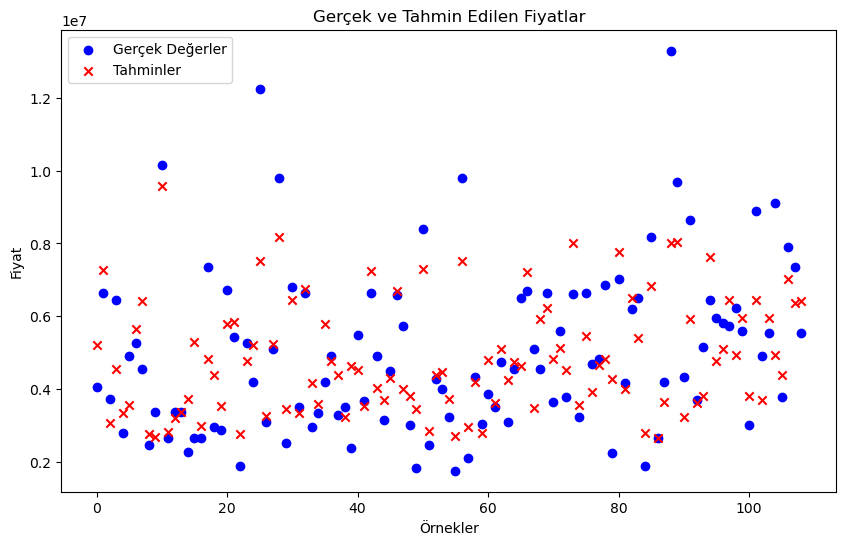

In [28]:
# Tahmini görselleştir
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Gerçek Değerler")
plt.scatter(range(len(y_test)), model.predict(X_test), color="red", marker="x", label="Tahminler")
plt.xlabel("Örnekler")
plt.ylabel("Fiyat")
plt.title("Gerçek ve Tahmin Edilen Fiyatlar")
plt.legend()
plt.show()

In [29]:
# 10. Modeli değerlendir
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# SST hesapla
mean_y = np.mean(y_train)
sst = np.sum((y_train - mean_y) ** 2)

# SSR hesapla
ssr = np.sum((y_pred_test - mean_y) ** 2)

# SSE hesapla
sse = np.sum((y_test - y_pred_test) ** 2)

# R2 skorunu hesapla
r2 = ssr / sst

print("\nSST (Toplam Kareler Toplamı):", sst)
print("SSR (Regresyon Kareler Toplamı):", ssr)
print("SSE (Artıkların Kareler Toplamı):", sse)
print("R2 skoru:", r2)


SST (Toplam Kareler Toplamı): 1344359076681619.2
SSR (Regresyon Kareler Toplamı): 265432086852071.06
SSE (Artıkların Kareler Toplamı): 193120871708749.75
R2 skoru: 0.1974413618028724
